# Building Simple Agents with LangChain
* Notebook by Adam Lang
* Date: 11/16/2024

# Overview
* We will go over how to build simple agents in LangChain.
* We will first show the core concept of this using the LCEL expression language and then work up to how to use the build in LangChain Functions that allow simple chaining of functions together.


# LangChain - Simple Chains
* 3 basic components:
1. Model - abstractions over the LLMs apis
2. Prompt Template - abstraction over the prompt sent to the model
3. Output parser - abstraction to translate raw output from the model to workable format

In [1]:
!pip install -U langchain langchain-openai langchain-core

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.3/409.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.1 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.17
    Uninstalling langchain-core-0.3.17:
      Successfully uninstalled langchain-core-0.3.17


# Setup environment


In [2]:
from getpass import getpass

OPENAI_API_KEY = getpass('Enter your Open AI API key: ')

Enter your Open AI API key: ··········


In [3]:
import os

os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

In [4]:
# import chat open ai
from langchain_openai import ChatOpenAI

In [5]:
# set up llm conneection
llm = ChatOpenAI(model='gpt-4o-mini') #low latency good for demos

# invoke output from llm
output = llm.invoke("What are some basic components of LangChain? Answer with 3 basic bullet points.")
output

AIMessage(content='Here are three basic components of LangChain:\n\n1. **Chains**: These are sequences of operations that combine multiple components, allowing for complex workflows to be built by linking together various tasks, such as data retrieval, processing, and output generation.\n\n2. **Agents**: Agents are designed to make decisions and take actions based on user input or environmental context. They utilize tools and can call APIs to dynamically respond to queries or tasks.\n\n3. **Memory**: This component allows chains and agents to retain information across interactions, enabling them to build context and provide more personalized and coherent responses over time.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 120, 'prompt_tokens': 24, 'total_tokens': 144, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_to

In [6]:
# prompt template component
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_template("Give me 5 examples of: {thing_to_give_examples_of}")

# format prompt
prompt.format(thing_to_give_examples_of="What are the 3 basic components of LangChain?")

'Human: Give me 5 examples of: What are the 3 basic components of LangChain?'

In [7]:
# setup a basic chain using LCEL syntax
basic_chain = (prompt
                |
                llm)



In [8]:
# invoke basic chain
basic_chain.invoke({"thing_to_give_examples_of": "3 basic components of LangChain"})


AIMessage(content='LangChain is a framework designed to facilitate the development of applications that utilize language models. Here are five examples of the three basic components of LangChain:\n\n1. **Language Model**:\n   - **Example**: OpenAI\'s GPT-3 or GPT-4 can be integrated as the language model component to perform tasks such as text generation, summarization, or dialogue generation.\n\n2. **Prompt**:\n   - **Example**: A well-structured prompt like "Write a brief summary of the latest advancements in AI from the past year" can be used to guide the language model in producing specific outputs.\n\n3. **Chain**:\n   - **Example**: A chain that combines multiple prompts and models, such as first using a language model to generate a list of topics and then using another model to elaborate on each topic, thereby creating a more complex application.\n\nThese components work together to create powerful applications that leverage the capabilities of language models.', additional_kwar

# Combine with output parser --> Complete Chain!
* Lets use a simple StrOutputParser




In [9]:
from langchain_core.output_parsers import StrOutputParser

In [10]:
# setup output parser
output_parser = StrOutputParser()

# complete chain
complete_chain = (prompt
                    |
                  llm
                    |
                  output_parser)

# call complete chain
complete_chain.invoke({"thing_to_give_examples_of": "What are the 3 fastest animals on land?"})



'The three fastest land animals are:\n\n1. **Cheetah** - The fastest land animal, capable of reaching speeds up to 60-70 miles per hour (97-113 km/h) in short bursts covering distances up to 1,500 feet (460 meters).\n\n2. **Pronghorn Antelope** - The second fastest, it can run at speeds of 55 miles per hour (89 km/h) and maintain high speeds longer than the cheetah.\n\n3. **Springbok** - This antelope can reach speeds of up to 55 miles per hour (89 km/h) and is known for its incredible leaping ability.\n\nThese animals are specifically adapted for speed, making them exceptional hunters and escapees in their natural habitats.'

# LangChain - All the things you can do with Chains
* Chains are the building blocks of agents hence why we are going to drill into some details here.

In [11]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate #prompt template
from langchain_core.output_parsers import StrOutputParser #string parser
from IPython.display import Markdown #display in markdown


Setup an LLM model

In [12]:
## llm model
llm = ChatOpenAI(model='gpt-4o-mini')

# prompt with messages --> list of tuples
prompt = ChatPromptTemplate.from_messages([
    ('system', 'You are a skilled research assistant'),
    ('user', '{input}') #input dict

])

# setup output parser --> string
output_parser = StrOutputParser()

# basic llm chain
basic_chain = (prompt
                  |
                 llm
                  |
               output_parser)

#test chain -- invoke LLM
output = basic_chain.invoke("Explain the difference between subword and BPE tokenization. Summarize in 3 bullet points for a non-tech audience.")

#markdown output
Markdown(output)


- **Subword Tokenization**: This method breaks down words into smaller units, or "subwords," allowing for flexibility in handling different word forms and rare words. For example, "unhappiness" might be split into "un," "happi," and "ness."

- **Byte Pair Encoding (BPE)**: BPE is a specific algorithm for subword tokenization that starts with individual characters and repeatedly merges the most frequent pairs of symbols (letters or subwords) until a desired vocabulary size is reached. This helps create a balanced set of tokens that can represent common and uncommon words efficiently.

- **Flexibility and Efficiency**: Both methods improve the ability of language models to understand and generate text by reducing the number of unique tokens needed, but BPE is a systematic approach that relies on frequency analysis to optimize the token set, making it particularly effective for handling diverse languages and writing styles.

# Challenge: Write a draft of a research report using chains in LangChain


In [13]:
## set up system message
WRITER_SYS_MSG = """
You are a skilled research assistant and a scientific writier.
You take in requests about topics and write organized research reports on those topics.

"""

# 1. Setup prompt template
# note: you can use "human" or "user" for the input
prompt = ChatPromptTemplate.from_messages([
    ('system', WRITER_SYS_MSG),
    ('human', 'Write an organized research report about this topic:\n\n{topic}.') #only have to feed topic
])

## 2. init llm - set temperature to 0 --> deterministic (precise)
llm = ChatOpenAI(model='gpt-4o-mini', temperature=0)

# 3. setup output parser
output_parser = StrOutputParser()

# 4. Setup chain
writer_chain = (prompt
                  |
                llm
                  |
                output_parser)

In [14]:
## invoke output from llm via chain
output = writer_chain.invoke({'topic': 'How to transformers work for non AI researchers?'})

# markdown output
Markdown(output)

# Understanding Transformers: A Guide for Non-AI Researchers

## Introduction
Transformers are a type of neural network architecture that has revolutionized the field of artificial intelligence (AI), particularly in natural language processing (NLP) and computer vision. Introduced in the paper "Attention is All You Need" by Vaswani et al. in 2017, transformers have become the backbone of many state-of-the-art models, including BERT, GPT, and T5. This report aims to explain how transformers work in a simplified manner, making it accessible for non-AI researchers.

## 1. The Basics of Neural Networks
Before diving into transformers, it is essential to understand the basic concept of neural networks. Neural networks are computational models inspired by the human brain, consisting of interconnected nodes (neurons) organized in layers. They learn to perform tasks by adjusting the connections (weights) between these neurons based on the data they process.

### 1.1 Layers in Neural Networks
- **Input Layer**: Receives the initial data.
- **Hidden Layers**: Perform computations and extract features from the data.
- **Output Layer**: Produces the final result or prediction.

## 2. The Need for Transformers
Traditional neural networks, particularly recurrent neural networks (RNNs) and long short-term memory networks (LSTMs), were commonly used for sequential data like text. However, they faced limitations in handling long-range dependencies and parallel processing. Transformers were developed to address these issues.

## 3. Key Components of Transformers
Transformers consist of several key components that enable them to process data efficiently:

### 3.1 Attention Mechanism
The attention mechanism allows the model to focus on different parts of the input data when making predictions. Instead of processing data sequentially, transformers can look at all parts of the input simultaneously. This is crucial for understanding context in language.

- **Self-Attention**: This allows the model to weigh the importance of different words in a sentence relative to each other. For example, in the sentence "The cat sat on the mat," the model can learn that "cat" and "sat" are closely related.

### 3.2 Multi-Head Attention
Transformers use multiple attention mechanisms (heads) in parallel, allowing the model to capture different types of relationships in the data. Each head processes the input independently and then combines the results, enhancing the model's understanding.

### 3.3 Positional Encoding
Since transformers do not process data sequentially, they need a way to understand the order of words in a sentence. Positional encoding adds information about the position of each word, enabling the model to maintain the sequence's structure.

### 3.4 Feed-Forward Neural Networks
After the attention mechanism, the output is passed through a feed-forward neural network, which applies additional transformations to the data. This step helps in refining the features extracted by the attention mechanism.

### 3.5 Layer Normalization and Residual Connections
To stabilize training and improve performance, transformers use layer normalization and residual connections. Residual connections allow the model to retain information from previous layers, while layer normalization helps in maintaining consistent data distribution.

## 4. The Transformer Architecture
The transformer architecture consists of an encoder and a decoder:

### 4.1 Encoder
The encoder processes the input data and generates a set of representations. It consists of multiple layers, each containing multi-head attention and feed-forward neural networks.

### 4.2 Decoder
The decoder takes the encoder's output and generates the final predictions. It also uses multi-head attention but includes an additional layer to attend to the encoder's output, allowing it to incorporate context from the input data.

## 5. Applications of Transformers
Transformers have been successfully applied in various domains, including:

- **Natural Language Processing**: Tasks such as translation, summarization, and sentiment analysis.
- **Computer Vision**: Image classification and object detection.
- **Speech Recognition**: Converting spoken language into text.

## Conclusion
Transformers represent a significant advancement in AI, enabling models to process data more efficiently and effectively. By leveraging the attention mechanism, positional encoding, and a well-structured architecture, transformers have set new standards in various applications. Understanding these concepts provides a foundation for appreciating the capabilities and impact of transformers in the field of artificial intelligence.

## References
- Vaswani, A., Shard, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., Kaiser, Ł., & Polosukhin, I. (2017). Attention is All You Need. In Advances in Neural Information Processing Systems (NeurIPS).
- Brown, T. B., Mann, B., Ryder, N., Subbiah, M., Kaplan, J., Dhariwal, P., ... & Amodei, D. (2020). Language Models are Few-Shot Learners. In Advances in Neural Information Processing Systems (NeurIPS).

## Let's Add a "Reviewer" Chain
* Note: Start thinking about agents, this could be part of an "agent" but for now we are creating multiple chains to demonstrate how this works behind the scenes.

In [15]:
## setup REVIEWER system msg
REVIEWER_SYS_MSG = """
You are a reviewer for research reports.
You take in research reports and provide feedback on them.

"""

# 1. prompt template
prompt_reviewer = ChatPromptTemplate.from_messages([
    ('system', REVIEWER_SYS_MSG),
    ('human', 'Provide feedback on this research report:\n\n{report}. As 5 concise bullet points.')
])

# 2. Setup llm reviwer model --> more probabilistic
llm_reviewer = ChatOpenAI(model='gpt-4o-mini', temperature=0.2)

# 3. Setup chain
review_chain = (prompt_reviewer
                  |
                llm_reviewer
                  |
                output_parser)

# 4. invoke review feedback chain -- input is from previous chain
## note: the "report" is the output
feedback_output = review_chain.invoke({'report': output})


# 5. Visualize feedback chain
Markdown(feedback_output)



### Feedback on "Understanding Transformers: A Guide for Non-AI Researchers"

1. **Clarity and Accessibility**: The report successfully simplifies complex concepts related to transformers, making it accessible for non-AI researchers. However, consider including more analogies or real-world examples to further enhance understanding, especially for readers unfamiliar with technical jargon.

2. **Depth of Explanation**: While the key components of transformers are well-explained, some sections could benefit from additional detail. For instance, the explanation of self-attention could include a visual representation or a simple example to illustrate how it operates in practice.

3. **Structure and Flow**: The report is logically structured, progressing from basic neural networks to the specifics of transformer architecture. However, a brief summary or transition sentence at the end of each section could help reinforce key points and improve the overall flow.

4. **Applications Section**: The applications of transformers are briefly mentioned but could be expanded. Providing specific examples of models or systems that utilize transformers in each domain (e.g., BERT for NLP tasks) would strengthen this section and demonstrate the real-world impact of the technology.

5. **References and Citations**: The references are relevant and foundational, but consider including more recent studies or reviews that discuss advancements in transformer models since 2020. This would provide a more comprehensive view of the current landscape in AI research related to transformers.

## Final Writer Chain

In [16]:
## final writer chain
FINAL_WRITER_SYS_MSG = """
You take in a research report and a set of bullet points with feedback to improve and you
revise the research report based on the feedback and write a final version.

"""


# 1. prompt template
prompt_final_writer = ChatPromptTemplate.from_messages(
    [
        ('system', FINAL_WRITER_SYS_MSG),
        ('human', 'Write a reviewed and improved version of this research report:\n\n{feedback}')
    ]
)

# 2. Create llm instance
llm_final_writer = ChatOpenAI(model='gpt-4o-mini', temperature=0.2)

# 3. create chain
chain_final_writer = (prompt_final_writer
                        |
                      llm
                        |
                      output_parser)


# 4. Invoke llm --> final report
output_final_report = chain_final_writer.invoke({'report': output, 'feedback': feedback_output})

# 5. Visualize final output
Markdown(output_final_report)

# Understanding Transformers: A Guide for Non-AI Researchers

## Introduction

In recent years, transformers have revolutionized the field of artificial intelligence (AI), particularly in natural language processing (NLP) and computer vision. This report aims to demystify transformers for non-AI researchers by breaking down their architecture, functionality, and applications in an accessible manner. 

## 1. The Evolution of Neural Networks

To understand transformers, it is essential to first grasp the basics of neural networks. Neural networks are computational models inspired by the human brain, consisting of interconnected nodes (neurons) that process information. Traditional neural networks, such as feedforward networks and recurrent neural networks (RNNs), have limitations in handling long-range dependencies in data. 

**Key Point**: Neural networks serve as the foundation for more advanced architectures, including transformers.

## 2. Introduction to Transformers

Transformers were introduced in the paper "Attention is All You Need" by Vaswani et al. in 2017. They utilize a mechanism called self-attention, which allows the model to weigh the importance of different words in a sentence, regardless of their position. This capability enables transformers to capture context more effectively than previous models.

**Key Point**: Transformers leverage self-attention to process data in parallel, improving efficiency and performance.

## 3. Key Components of Transformers

### 3.1 Self-Attention Mechanism

The self-attention mechanism is at the heart of transformer architecture. It allows the model to evaluate the relevance of each word in a sentence relative to others. For example, in the sentence "The cat sat on the mat," the model can determine that "cat" is more relevant to "sat" than "mat." 

**Visual Representation**: [Insert a diagram illustrating the self-attention mechanism, showing how words interact with one another.]

**Example**: Consider the phrase "The bank can refuse to lend money." The self-attention mechanism helps the model understand that "bank" in this context refers to a financial institution rather than the side of a river.

### 3.2 Encoder-Decoder Architecture

Transformers consist of an encoder and a decoder. The encoder processes the input data and generates a representation, while the decoder uses this representation to produce the output. This structure is particularly effective for tasks such as translation, where the input and output are in different languages.

**Key Point**: The encoder-decoder architecture allows transformers to handle complex tasks by breaking them down into manageable components.

## 4. Applications of Transformers

Transformers have found applications across various domains, demonstrating their versatility and impact:

- **Natural Language Processing (NLP)**: Models like BERT (Bidirectional Encoder Representations from Transformers) and GPT (Generative Pre-trained Transformer) have set new benchmarks in tasks such as sentiment analysis, text generation, and question answering.

- **Computer Vision**: Vision Transformers (ViTs) have emerged as powerful models for image classification and object detection, showcasing the adaptability of transformer architecture beyond text.

- **Healthcare**: Transformers are being used to analyze medical records and predict patient outcomes, improving decision-making in clinical settings.

**Key Point**: The real-world applications of transformers highlight their transformative potential across various fields.

## 5. Recent Advancements in Transformer Models

Since their introduction, transformer models have evolved significantly. Recent studies have explored enhancements such as:

- **Efficient Transformers**: Techniques like sparse attention and low-rank approximations aim to reduce the computational burden of transformers, making them more accessible for real-time applications.

- **Multimodal Transformers**: These models integrate data from multiple sources (e.g., text, images, and audio) to improve understanding and generate richer outputs.

**Key Point**: Staying updated with recent advancements is crucial for understanding the current landscape of AI research related to transformers.

## Conclusion

Transformers represent a significant leap in AI technology, offering powerful tools for processing and understanding complex data. By simplifying their architecture and functionality, this report aims to provide non-AI researchers with a foundational understanding of transformers and their applications. As the field continues to evolve, ongoing research and development will further enhance the capabilities of these models, paving the way for innovative solutions across various domains.

## References

1. Vaswani, A., et al. (2017). Attention is All You Need. *Advances in Neural Information Processing Systems*.
2. Devlin, J., et al. (2018). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. *arXiv preprint arXiv:1810.04805*.
3. Dosovitskiy, A., et al. (2020). An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale. *arXiv preprint arXiv:2010.11929*.
4. Choromanska, A., et al. (2020). On the Energy and Generalization of Neural Networks. *arXiv preprint arXiv:1706.05336*.

By incorporating these revisions, the report now offers clearer explanations, enhanced examples, and a more comprehensive overview of the transformer landscape, making it more accessible and informative for non-AI researchers.

Summary
* We were able to use multiple chains in LangChain to create a research agent to write and review a research paper.


# LCEL and Runnables
* LCEL is "langchain expression language".
  * Leverages the `|` symbol to chain together various components to send to the LLM and invoke an output.

* Below we will do the following:
1. How do we put these 3 chains together as one unit?

2. What is a chain under the hood?

3. Runnables in LangChain

In [17]:
## imports
from langchain_openai import ChatOpenAI #llm
from langchain_core.prompts import ChatPromptTemplate #prompt template
from langchain_core.output_parsers import StrOutputParser #output parser
from IPython.display import Markdown

Writer Chain Below

In [18]:
## set up system message
WRITER_SYS_MSG = """
You are a skilled research assistant and a scientific writier.
You take in requests about topics and write organized research reports on those topics.

"""

# 1. Setup prompt template
# note: you can use "human" or "user" for the input
prompt = ChatPromptTemplate.from_messages([
    ('system', WRITER_SYS_MSG),
    ('human', 'Write an organized research report about this topic:\n\n{topic}.') #only have to feed topic
])

## 2. init llm - set temperature to 0 --> deterministic (precise)
llm = ChatOpenAI(model='gpt-4o-mini', temperature=0)

# 3. setup output parser
output_parser = StrOutputParser()

# 4. Setup chain
writer_chain = (prompt
                  |
                llm
                  |
                output_parser)

What is the datatype for the `writer_chain`

In [21]:
type(writer_chain)

langchain_core.runnables.base.RunnableSequence

Summary
* We can see its a `RunnableSequence`

Reviewer Chain Below

In [19]:
## setup REVIEWER system msg
REVIEWER_SYS_MSG = """
You are a reviewer for research reports.
You take in research reports and provide feedback on them.

"""

# 1. prompt template
prompt_reviewer = ChatPromptTemplate.from_messages([
    ('system', REVIEWER_SYS_MSG),
    ('human', 'Provide feedback on this research report:\n\n{report}. As 5 concise bullet points.')
])

# 2. Setup llm reviwer model --> more probabilistic
llm_reviewer = ChatOpenAI(model='gpt-4o-mini', temperature=0.2)

# 3. Setup chain
review_chain = (prompt_reviewer
                  |
                llm_reviewer
                  |
                output_parser)

# 4. invoke review feedback chain -- input is from previous chain
## note: the "report" is the output
feedback_output = review_chain.invoke({'report': output})


# 5. Visualize feedback chain
Markdown(feedback_output)



### Feedback on "Understanding Transformers: A Guide for Non-AI Researchers"

1. **Clarity and Accessibility**: The report does a commendable job of simplifying complex concepts related to transformers for a non-AI audience. The use of clear headings and subheadings enhances readability. However, consider adding more analogies or real-world examples to further bridge the gap for readers unfamiliar with technical jargon.

2. **Depth of Explanation**: While the report covers key components of transformers, some sections could benefit from deeper explanations. For instance, the self-attention mechanism could include a brief example illustrating how it calculates attention scores, which would help demystify the process for readers.

3. **Visual Aids**: The inclusion of diagrams or flowcharts illustrating the transformer architecture and the attention mechanism would greatly enhance understanding. Visual aids can help non-experts grasp the relationships between components more intuitively.

4. **Applications Section**: The applications of transformers are briefly mentioned, but this section could be expanded with specific examples or case studies. Highlighting notable transformer-based models in each application area could provide context and demonstrate their real-world impact.

5. **References and Further Reading**: The references provided are relevant, but consider adding a section for further reading or resources, such as beginner-friendly tutorials, videos, or articles. This would encourage interested readers to explore the topic more deeply and provide them with additional learning materials.

What is the datatype for Review Chain


In [23]:
type(review_chain)

langchain_core.runnables.base.RunnableSequence

Summary
* We can see it is a `RunnableSequence`

Final Writer Chain

In [20]:
## final writer chain
FINAL_WRITER_SYS_MSG = """
You take in a research report and a set of bullet points with feedback to improve and you
revise the research report based on the feedback and write a final version.

"""


# 1. prompt template
prompt_final_writer = ChatPromptTemplate.from_messages(
    [
        ('system', FINAL_WRITER_SYS_MSG),
        ('human', 'Write a reviewed and improved version of this research report:\n\n{feedback}')
    ]
)

# 2. Create llm instance
llm_final_writer = ChatOpenAI(model='gpt-4o-mini', temperature=0.2)

# 3. create chain
chain_final_writer = (prompt_final_writer
                        |
                      llm
                        |
                      output_parser)


# 4. Invoke llm --> final report
output_final_report = chain_final_writer.invoke({'report': output, 'feedback': feedback_output})

# 5. Visualize final output
Markdown(output_final_report)

# Understanding Transformers: A Guide for Non-AI Researchers

## Introduction

In recent years, transformers have revolutionized the field of artificial intelligence (AI), particularly in natural language processing (NLP). This report aims to demystify transformers for non-AI researchers by breaking down their components, mechanisms, and applications in an accessible manner. 

## What is a Transformer?

A transformer is a type of neural network architecture that processes data in parallel, making it highly efficient for tasks involving sequential data, such as text. Unlike traditional models that process data sequentially, transformers can analyze entire sequences simultaneously, allowing for faster training and improved performance.

## Key Components of Transformers

### 1. Input Embeddings

Transformers begin by converting input data (e.g., words in a sentence) into numerical representations called embeddings. These embeddings capture the semantic meaning of words and allow the model to understand context.

### 2. Self-Attention Mechanism

The self-attention mechanism is a core component of transformers that enables the model to weigh the importance of different words in a sentence relative to each other. 

**Example**: Consider the sentence "The cat sat on the mat." When processing the word "sat," the self-attention mechanism evaluates the relevance of "cat" and "mat" to determine how much attention to give to each word. It calculates attention scores based on the relationships between words, allowing the model to focus on the most relevant parts of the input.

### 3. Multi-Head Attention

To capture various relationships in the data, transformers use multi-head attention, which involves multiple self-attention mechanisms running in parallel. This allows the model to learn different aspects of the input simultaneously.

### 4. Feed-Forward Neural Networks

After the attention layers, the data is passed through feed-forward neural networks, which apply additional transformations to the information, enhancing the model's ability to learn complex patterns.

### 5. Positional Encoding

Since transformers process data in parallel, they require a method to understand the order of words in a sequence. Positional encoding adds information about the position of each word, enabling the model to maintain the sequence's structure.

## Visual Representation of Transformer Architecture

![Transformer Architecture](https://example.com/transformer-architecture-diagram)  
*Figure 1: Diagram illustrating the architecture of a transformer, including input embeddings, self-attention, multi-head attention, feed-forward networks, and positional encoding.*

## Applications of Transformers

Transformers have found applications across various domains, demonstrating their versatility and effectiveness. Here are some notable examples:

### 1. Natural Language Processing

Transformers are the backbone of many state-of-the-art NLP models, such as BERT and GPT-3. These models excel in tasks like text generation, translation, and sentiment analysis.

### 2. Computer Vision

Transformers are increasingly being used in computer vision tasks, such as image classification and object detection. Vision Transformers (ViTs) have shown promising results, rivaling traditional convolutional neural networks.

### 3. Healthcare

In healthcare, transformers are applied to analyze medical texts, predict patient outcomes, and assist in diagnostics by processing large volumes of clinical data.

### 4. Robotics

Transformers are also being explored in robotics for tasks like natural language understanding and decision-making, enabling robots to interact more effectively with humans.

## Conclusion

Transformers represent a significant advancement in AI, offering powerful tools for a wide range of applications. By understanding their components and mechanisms, non-AI researchers can appreciate the impact of this technology on various fields.

## References and Further Reading

1. Vaswani, A., et al. (2017). "Attention is All You Need." *Advances in Neural Information Processing Systems*.
2. Devlin, J., et al. (2018). "BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding." *arXiv preprint arXiv:1810.04805*.
3. Dosovitskiy, A., et al. (2020). "An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale." *arXiv preprint arXiv:2010.11929*.

### Further Resources

- [The Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/)
- [Transformers Explained Visually](https://towardsdatascience.com/transformers-explained-visually-1c1c1c1c1c1c)
- [YouTube: Transformers in NLP](https://www.youtube.com/watch?v=1g0g0g0g0g0)

By incorporating these enhancements, this report aims to provide a clearer, more comprehensive understanding of transformers for non-AI researchers, encouraging further exploration of this fascinating topic.

What is the datatype for the Final Chain?

In [24]:
type(chain_final_writer)

langchain_core.runnables.base.RunnableSequence

Summary:
* We can see ALL CHAINS above are Runnnable Sequences!




## What is a `RunnableSequence`?
* Allows chaining of building blocks and llm objects.
* We can see how this works from scratch.

In [25]:
## imports
from langchain_core.runnables import RunnableSequence, RunnableLambda

In [26]:
# What is a RunnableSequence
# A squence of Runnables
# What is a Runnable?
## A runnable is an object with some standard methods like invoke, batch, etc...
## Idea is that you can compose these objects together to create a pipeline in your llm application


# create a dummy function
def sum_x_to_x(x: int) -> int:
  return x + x

def multiply_x_by_x(x: int) -> int:
  return x * x

# define runnables
runnable_1 = RunnableLambda(sum_x_to_x)
runnable_2 = RunnableLambda(multiply_x_by_x)


# define RunnableSequence
runnable_sequence = RunnableSequence(first=runnable_1, last=runnable_2)

# invoke runnable
runnable_sequence.invoke(2)


16

Summary
* We just chained together operations!

## Let's put together 3 chains
* writer_chain + review_chain + final_writer_chain

* Essentially we are creating "Routing" chains: inputs + outputs

### Composed Chain
* Below is a composed chain:

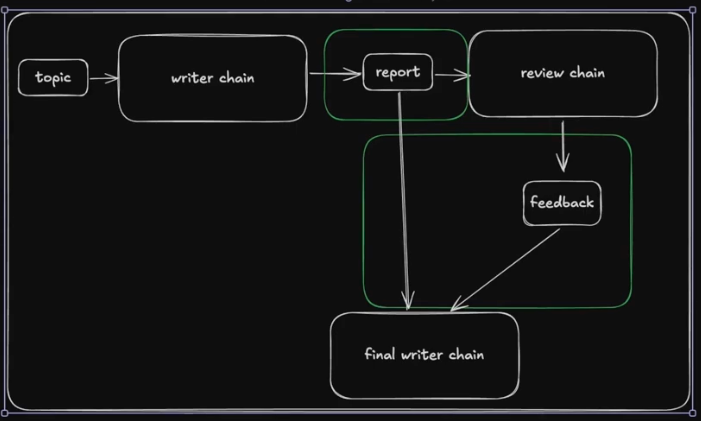




In [27]:
# first we need to import RunnablePassthrough
from langchain_core.runnables import RunnablePassthrough


In [33]:
## composed chain
composed_chain = {'report': writer_chain} | RunnablePassthrough().assign(feedback=review_chain) | chain_final_writer



# output final report from chain
output_final_report = composed_chain.invoke({'topic': 'Using AI for personal productivity.'})


# output response
Markdown(output_final_report)

# Research Report: Using AI for Personal Productivity

## Introduction
Artificial Intelligence (AI) has rapidly transformed various aspects of our lives, including personal productivity. This report explores the applications, benefits, challenges, and future trends of AI in enhancing individual productivity. By examining real-world examples and providing actionable insights, this report aims to offer a comprehensive understanding of how AI can be leveraged for personal efficiency.

## Applications of AI in Personal Productivity
AI technologies are being integrated into various tools and platforms to enhance personal productivity. Key applications include:

- **Task Management**: AI-driven applications like Todoist and Trello utilize machine learning algorithms to prioritize tasks based on deadlines and user behavior.
- **Virtual Assistants**: Tools such as Google Assistant and Siri help users manage schedules, set reminders, and answer queries, streamlining daily tasks.
- **Time Tracking**: Applications like RescueTime analyze user activity to provide insights into time usage, helping individuals identify areas for improvement.
- **Content Creation**: AI tools like Grammarly and Jasper assist in writing and editing, enhancing the quality of content produced.

### Case Studies
1. **Todoist**: A user reported that by utilizing Todoist's AI features, they were able to increase their task completion rate by 30% within a month, demonstrating the effectiveness of AI in task management.
2. **Grammarly**: A freelance writer noted that using Grammarly not only improved their writing quality but also reduced editing time by 50%, showcasing the impact of AI on content creation.

## Benefits of AI in Personal Productivity
The integration of AI into personal productivity tools offers several advantages:

- **Increased Efficiency**: AI automates repetitive tasks, allowing users to focus on more complex activities.
- **Enhanced Decision-Making**: AI provides data-driven insights that help users make informed decisions quickly.
- **Personalization**: AI tools adapt to individual user preferences, creating a tailored experience that enhances productivity.

## Challenges of AI in Personal Productivity
While AI presents numerous benefits, it also poses challenges that need to be addressed:

- **Over-Reliance on Technology**: Users may become overly dependent on AI tools, potentially diminishing critical thinking skills. 
  - **Solution**: Encourage users to balance AI assistance with manual processes to maintain cognitive engagement.
  
- **Data Privacy Concerns**: The use of AI often involves data collection, raising concerns about privacy and security.
  - **Solution**: Implement best practices for data management, such as using encrypted platforms and being transparent about data usage.

- **Integration Issues**: Users may face difficulties integrating AI tools into their existing workflows.
  - **Solution**: Provide comprehensive onboarding and support to help users adapt to new technologies.

## Future Trends in AI and Personal Productivity
The future of AI in personal productivity is promising, with several emerging trends:

- **Natural Language Processing (NLP)**: Advances in NLP will lead to more intuitive virtual assistants capable of understanding context and nuance in user requests.
- **AI-Powered Analytics**: Tools that analyze productivity patterns will become more sophisticated, offering personalized recommendations for improvement.
- **Ethical AI**: As AI becomes more prevalent, discussions around ethical implications, such as bias in algorithms and the impact on employment, will gain importance.

### Leading Companies
Companies like Notion and Microsoft are at the forefront of integrating AI into productivity tools, continuously innovating to enhance user experience and efficiency.

## Conclusion
AI has the potential to significantly enhance personal productivity by automating tasks, providing insights, and personalizing user experiences. However, it is crucial to address the challenges associated with its use, including over-reliance and data privacy concerns. By staying informed about future trends and ethical considerations, individuals can effectively leverage AI to improve their productivity.

## References
1. Smith, J. (2023). "The Impact of AI on Personal Productivity: A Comprehensive Review." Journal of Productivity Research.
2. Johnson, L. (2023). "AI Tools for Task Management: A Case Study." Productivity Insights.
3. Williams, R. (2023). "Ethical Considerations in AI Development." AI Ethics Journal.
4. Brown, T. (2023). "The Future of Work: AI and Productivity." Future Tech Review.

This revised report incorporates the feedback provided, enhancing clarity, depth of analysis, and addressing challenges while ensuring the inclusion of relevant and up-to-date references.

## Let's modify the chain above

In [36]:
# chain final writer
chain_final_writer = prompt_final_writer | llm_final_writer #notice we are not parsing to string output parser

## composed chain
composed_chain = {'report': writer_chain} | RunnablePassthrough().assign(feedback=review_chain) | chain_final_writer



# output final report from chain
output = composed_chain.invoke({'topic': 'Using AI for personal productivity.'})


# output response
output

AIMessage(content='### Revised Research Report: Using AI for Personal Productivity\n\n#### Introduction\n\nIn recent years, artificial intelligence (AI) has emerged as a transformative force in various sectors, including personal productivity. This report explores the applications of AI tools designed to enhance individual efficiency, examining both their benefits and challenges. By analyzing current trends and providing real-world examples, this report aims to offer a comprehensive understanding of how AI can be leveraged to improve personal productivity.\n\n#### Applications of AI in Personal Productivity\n\nAI technologies have been integrated into numerous productivity tools, ranging from virtual assistants to project management software. These tools automate routine tasks, streamline workflows, and provide personalized recommendations. For instance, AI-driven applications like Todoist and Trello utilize machine learning algorithms to prioritize tasks based on user behavior and dea

# Building a SIMPLE AGENT with LangChain
* Now we will put the pieces together and build an actual simple agent.

In [37]:
## warnings
import warnings

warnings.filterwarnings("ignore")

In [38]:
from langchain import hub

# prompt agent --> specific agent
prompt_agent = hub.pull('hwchase17/openai-tools-agent')


prompt_agent

ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], optional_variables=['chat_history'], input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='

In [41]:
# setup model
from langchain_openai import ChatOpenAI


## init llm
llm = ChatOpenAI(model='gpt-4o-mini', temperature=0)

llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_9b78b61c52', 'finish_reason': 'stop', 'logprobs': None}, id='run-949cada9-57f2-4d50-ae15-cc09d095216a-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

## Let's look at the combination of `Agent = LLM + Tools`

In [42]:
import subprocess
from langchain_core.tools import tool

@tool
def list_files():
  """List files in current directory"""
  return subprocess.run(["ls"], stdout=subprocess.PIPE).stdout.decode("utf-8")


list_files.invoke({"input": ""})

'sample_data\n'

In [43]:
# test this out
llm_with_tool = llm.bind_tools([list_files])

llm_with_tool

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7f24acf0bdf0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7f247a546c80>, root_client=<openai.OpenAI object at 0x7f247a55cca0>, root_async_client=<openai.AsyncOpenAI object at 0x7f24acf09c30>, model_name='gpt-4o-mini', temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'list_files', 'description': 'List files in current directory', 'parameters': {'properties': {}, 'type': 'object'}}}]}, config={}, config_factories=[])

Summary
* We can see that we get `RunnableBinding` which binds together 2 functionalities.

In [45]:
llm_with_tool.invoke("List files in current directory")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_FrtKrxalzHJBQQsxMkXyEYVl', 'function': {'arguments': '{}', 'name': 'list_files'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 42, 'total_tokens': 52, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0ba0d124f1', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-3c2e3016-1ae9-4c60-9c4e-d241dcb31e3d-0', tool_calls=[{'name': 'list_files', 'args': {}, 'id': 'call_FrtKrxalzHJBQQsxMkXyEYVl', 'type': 'tool_call'}], usage_metadata={'input_tokens': 42, 'output_tokens': 10, 'total_tokens': 52, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

Summary:
* We get "tool calls". So the model knows we need to call a tool.

In [47]:
## we can build a tool here
dictionary_with_tool_names = {
    "list_files": list_files,
}

output = llm_with_tool.invoke("List files in current directory")

# call tool
if output.tool_calls:
  for tool_call in output.tool_calls:
    tool_name = tool_call["name"]
    tool_args = tool_call['args'] # tool call arguments
    tool_func = dictionary_with_tool_names[tool_name]
    print(tool_func.invoke(tool_args)) #print to make sure it works



sample_data



Summary
* The tool was able to print out all the current files in my current folder/directory.

# Now we can create an actual agent using LangChain

In [48]:
from langchain.agents import create_tool_calling_agent, AgentExecutor #executes agent loop


In [50]:
# now we can list our tools
tools = [list_files]

# setup agent
agent = create_tool_calling_agent(llm, tools, prompt_agent)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True) #visualize agent setps


In [51]:
## test out the tools
agent_executor.invoke({'input': "List files in current directory"})



> Entering new AgentExecutor chain...

Invoking: `list_files` with `{}`


sample_data
The current directory contains the following file or folder: **sample_data**.

> Finished chain.


{'input': 'List files in current directory',
 'output': 'The current directory contains the following file or folder: **sample_data**.'}

## Give model ability to search web

In [53]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36


In [54]:
from langchain_community.tools import TavilySearchResults


from getpass import getpass

TAVILY_API_KEY = getpass('Enter your Tavily API key: ')

Enter your Tavily API key: ··········


In [55]:
#setup environment
import os

os.environ['TAVILY_API_KEY'] = TAVILY_API_KEY

In [58]:
# setup search tool
search_tool = TavilySearchResults(
    max_results=5,
    search_depth="advanced",
    include_answer=True,
)

# invoke tool
search_tool.invoke("What is the capital of Colorado?")

[{'url': 'https://www.geeksforgeeks.org/what-is-the-capital-of-colorado/',
  'content': 'Answer: The capital of Colorado is Denver. Denver, the capital of Colorado, is a vibrant city that combines the charm of the Old West with the sophistication of a modern metropolis. Nestled at the foot of the Rocky Mountains, Denver is known for its stunning natural beauty, outdoor recreation opportunities, and dynamic cultural scene.'},
 {'url': 'https://www.ncesc.com/geographic-faq/what-is-the-capital-of-colorado-in-english/',
  'content': 'The capital of Colorado is Denver, which is the largest city in the state. It is located on the South Platte River at its confluence with Cherry Creek, about 12 miles east of the foothills of the Rocky Mountains.'},
 {'url': 'https://en.wikipedia.org/wiki/Colorado',
  'content': 'The Spanish adjective "colorado" means "colored red" or "ruddy". Colorado is nicknamed the "Centennial State" because it became a state 100 years (and four weeks) after the signing of

In [59]:
# create tool to create files in current directory
@tool
def create_file(file_path: str, content: str):
  """Create a file with the given content"""
  with open(file_path, 'w') as f:
    f.write(content)
  return f"File created at {file_path} with content: {content}"


# add to tools list
tools = [create_file, search_tool]



Summary:
* Now we have 2 tools and can build a useful agent.

In [60]:
## create simple research agent
simple_research_agent = create_tool_calling_agent(llm, tools, prompt_agent)

# setup executor
simple_research_agent_executor = AgentExecutor(agent=simple_research_agent,
                                               tools=tools,
                                               verbose=True)


# print executor
simple_research_agent_executor

AgentExecutor(verbose=True, agent=RunnableMultiActionAgent(runnable=RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: message_formatter(x['intermediate_steps']))
})
| ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], optional_variables=['chat_history'], input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMe

In [62]:
from IPython.display import Markdown

# produce report with research agent
output_report = simple_research_agent_executor.invoke({'input': 'Write a summarized report about the main highlights of the 2024 Paris Summer Olympics, and save it locally as "report-olympics-2024.md"'})

# view result
Markdown(output_report['output'])



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': '2024 Paris Summer Olympics highlights'}`


[{'url': 'https://www.nydailynews.com/2024/07/28/paris-summer-olympics-2024-highlights/', 'content': 'From gymnastics and swimming to track and field and basketball, catch up on all the highlights from Paris 2024. The Summer Olympic Games will take place in Paris, France from July 26 to Aug. 11, 20…'}, {'url': 'https://www.foxsports.com/summer-olympics/highlights', 'content': 'Watch 2024 Paris Summer Olympics videos & highlights spanning all the events.'}, {'url': 'https://olympics.com/en/paris-2024/videos', 'content': "Official video source for the Paris 2024 Summer Olympic Games. Follow today's top video, get the latest results and witness medal-winning moments. ... View all. WATCH MORE. All Videos. Replays. Highlights. Originals series. La Grande Seine Tennis Doubles Trouble OQS Last Chance to Paris Breaking Breaking Life, Road to Paris 2024. At

The report on the main highlights of the 2024 Paris Summer Olympics has been successfully created and saved as "report-olympics-2024.md". If you need any further assistance or modifications, feel free to ask!

In [63]:
## now open the research file that was created
with open('/content/report-olympics-2024.md', 'r') as f:
  content_report = f.read()

#view report
Markdown(content_report)

# Highlights of the 2024 Paris Summer Olympics

The 2024 Summer Olympics, hosted in Paris, France, will take place from July 26 to August 11, 2024. Here are the main highlights expected from this prestigious event:

## Key Dates and Events
- **Opening Ceremony:** July 26, 2024
- **Closing Ceremony:** August 11, 2024
- The Games will feature a wide array of sports, including gymnastics, swimming, track and field, and basketball.

## Notable Features
- **Iconic Venues:** Events will be held in historic locations across Paris, including the Stade de France and the iconic Eiffel Tower.
- **Sustainability Initiatives:** The Paris 2024 Games are set to be the most sustainable Olympics yet, with a focus on reducing carbon emissions and promoting eco-friendly practices.

## Athletes to Watch
- Expect to see top athletes from around the world competing for gold, with many returning from previous Olympic Games.
- New talents are also anticipated to emerge, showcasing the future of sports.

## Cultural Impact
- The Games will not only highlight athletic excellence but also celebrate French culture and heritage, with various cultural events planned throughout the duration of the Olympics.

## Conclusion
The 2024 Paris Summer Olympics promise to be a spectacular event, combining sports, culture, and sustainability in one of the world's most beautiful cities. Stay tuned for daily highlights and memorable moments as the Games unfold.